<a href="https://colab.research.google.com/github/sylwia-sapkowska/intro-to-ml/blob/main/1_Introduction%2C_visualization%2C_descriptive_statistics_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://drive.google.com/uc?export=view&id=12CrUdXDAiltLBT26sG7HZ_HciIhvGyT8'></center>

# Wstęp do uczenia maszynowego - Notebook 1, version for students
**Author: Jacek Sroka and Michał Ciach**


In this introductory class you will learn about:

1. Jupiter notebooks and Google Colab.
2. Working with data.
3. Visualizing and summarizing data.
4. Elements of descriptive statistics.

We expect you can program in Python (if you need to refresh check out [these](https://www.youtube.com/playlist?list=PLWKjhJtqVAbnqBxcdjVGgT3uVR10bzTEB)).




## Jupyther notebooks and Google Colab ##

Google Colab (or Colaboratory) is a service that allows execution of [Jupyter](https://jupyter.org/) notebooks in a browser on a machine hosted on Google Cloud. Colabs are stored on gdrive and can be shared between users. If you don't have edit permission for the viewed notebook you can always make a copy on your gdrive (see `File->Save a copy in drive` menu).

You can also download the notebook to your local machine in `.ipynb` Jupyter file format (see `File->Download->Download .ipynb`). If you want to work on the local machine you can use [PyCharm Professional Edition](https://www.jetbrains.com/pycharm/) (as a student you are eligible for [free](https://www.jetbrains.com/community/education/#students) license) or you can install Jupyter Notebook or JupyterLab (see instructions on [this](https://jupyter.org/) page).

Remember that with Colab the notebook is executed on a machine in the cloud and the data on that machine is not persisted in the notebook. It will be lost if the machine is reclaimed after not being used for a while. Future executions will start with fresh machines.

To start up please go through this [overview notebook](https://colab.research.google.com/notebooks/basic_features_overview.ipynb#scrollTo=7bqjkGKwQSHW). If you are interested in knowing more about markup here is a [good guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb). Then make a copy of this colab in your gdrive and follow with the exercises.

### Exercise 1 ###
Download the file `https://raw.githubusercontent.com/scikit-learn/scikit-learn/7f9bad99d6e0a3e8ddf92a7e5561245224dab102/sklearn/datasets/data/iris.csv` from the Internet to the Google Cloud machine running your notebook. Use shell commands like `!wget` or `!curl`. List the first few lines of the local files to confirm the file was downloaded. Finally, display the content on the full screen using the option in the context menu.

In [ ]:
# Put your code here


In [ ]:
# Put your code here


### Exercise 2 ###
Using the left-hand side menu in Colab switch to `Files` tab and download the `iris.csv` from the Google Cloud machine running your notebook to your local machine. Note that you can also use this menu to upload files.

### Exercise 3 ###
Note that you can use the `Mount Drive` icon in the `Files` tab to generate a code cell that mounts your gdrive folder into the Google Cloud machine running the notebook. Use the same gdrive account where you store the Colab notebook. As an exercise try this now and note how a new folder appears in the `Files` tab (inspect its content). If you write to the drive using the mounted folder remember to do `drive.flush_and_unmount()` at the end to persist your changes. You can read more about uploading files and data sources (Google Spreadsheet, Google Cloud Storage) in this [notebook](https://colab.research.google.com/notebooks/io.ipynb).

### Exercise 4 ###
Add a new comment to the cell (note the existing comment on the right).

## Working with data ##

We are going to start with installing and importing some required libraries. If needed, restart the runtime to make sure the packages are loaded (see `Restart->Restart runtime` menu). Note that the most useful libraries are already installed in Colab, but sometimes we want to install the newest version.

In [ ]:
!pip install numpy pandas matplotlib --upgrade

Now let us import the libraries we will be using.

In [ ]:
import matplotlib as plt
import numpy as np
import pandas as pd
import plotly.express as px

You can print documentation from Python functions.

In [ ]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        ``__array__`` method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array. If not given, NumPy will try to use
        a default ``dtype`` that can represent the values (by applying promotion
        rules when necessary.)
    copy : bool, optional
        If ``True`` (default), then the array data is copied. If ``None``,
        a copy will only be made if ``__array__`` returns a copy, if obj is
        a nested sequence, or if a copy is needed to satisfy any of the other
        requirements (``dtype``, ``o

You can also display it in a separate tab.

In [ ]:
?np.array

Numpy is very fast compared to native Python. We can check this by using magic commands built into notebooks (see this [notebook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb) for more details, but carefull not everything there works in colab).

In [ ]:
# pure Python
list1 = list(range(int(1e6)))
list2 = list(range(int(1e6)))

# Numpy
arr1 = np.array(list1)
arr2 = np.array(list2)

In [ ]:
%%time
result = 0
for x1, x2 in zip(list1, list2):
  result += x1*x2
result

CPU times: user 187 ms, sys: 942 µs, total: 188 ms
Wall time: 188 ms


333332833333500000

In [ ]:
%%time
(arr1*arr2).sum()

CPU times: user 2.96 ms, sys: 2.69 ms, total: 5.65 ms
Wall time: 5.78 ms


np.int64(333332833333500000)

In [ ]:
%%time
np.dot(arr1, arr2)

CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 2.01 ms


np.int64(333332833333500000)

We can use Numpy to read and parse data. Most often it is shared in CSV format. We will read the sample data provided in Colab. Check the [docs](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) for additional features like filling in missing values.

In [ ]:
arr = np.genfromtxt("sample_data/california_housing_train.csv", delimiter=",", dtype=str)
display(arr)

array([['"longitude"', '"latitude"', '"housing_median_age"', ...,
        '"households"', '"median_income"', '"median_house_value"'],
       ['-114.310000', '34.190000', '15.000000', ..., '472.000000',
        '1.493600', '66900.000000'],
       ['-114.470000', '34.400000', '19.000000', ..., '463.000000',
        '1.820000', '80100.000000'],
       ...,
       ['-124.300000', '41.840000', '17.000000', ..., '456.000000',
        '3.031300', '103600.000000'],
       ['-124.300000', '41.800000', '19.000000', ..., '478.000000',
        '1.979700', '85800.000000'],
       ['-124.350000', '40.540000', '52.000000', ..., '270.000000',
        '3.014700', '94600.000000']], shape=(17001, 9), dtype='<U20')

In [ ]:
arr = np.genfromtxt("sample_data/california_housing_train.csv", delimiter=",", dtype=str, skip_header=1)
longitude, latitude, housing_median_age, total_rooms, total_bedrooms,	population,	households, median_income, median_house_value = arr.T
longitude

array(['-114.310000', '-114.470000', '-114.560000', ..., '-124.300000',
       '-124.300000', '-124.350000'], shape=(17000,), dtype='<U13')

We assume that you know Numpy from other classes. If not see this [tutorial](https://numpy.org/doc/stable/user/quickstart.html).

Note that all elements in Numpy arrays have the same type. We can use Pandas to read heterogeneous data.

In [ ]:
df = pd.read_csv("sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


We can get a basic summary of the values. It is a good practice to clean the data before doing any analysis. As a minimum one should deal with missing values (see [df.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) method). It is also a good idea to filter out values that do not make sense (see this [tutorial](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html) for different methods).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can convert Pandas output to vanilla Python in multiple ways. Compare the following.

In [ ]:
list(df.to_dict()["median_house_value"].values())[:20]

[66900.0,
 80100.0,
 85700.0,
 73400.0,
 65500.0,
 74000.0,
 82400.0,
 48500.0,
 58400.0,
 48100.0,
 86500.0,
 62000.0,
 48600.0,
 70400.0,
 45000.0,
 69100.0,
 94900.0,
 25000.0,
 44000.0,
 27500.0]

In [ ]:
df.to_dict("records")[:5]

[{'longitude': -114.31,
  'latitude': 34.19,
  'housing_median_age': 15.0,
  'total_rooms': 5612.0,
  'total_bedrooms': 1283.0,
  'population': 1015.0,
  'households': 472.0,
  'median_income': 1.4936,
  'median_house_value': 66900.0},
 {'longitude': -114.47,
  'latitude': 34.4,
  'housing_median_age': 19.0,
  'total_rooms': 7650.0,
  'total_bedrooms': 1901.0,
  'population': 1129.0,
  'households': 463.0,
  'median_income': 1.82,
  'median_house_value': 80100.0},
 {'longitude': -114.56,
  'latitude': 33.69,
  'housing_median_age': 17.0,
  'total_rooms': 720.0,
  'total_bedrooms': 174.0,
  'population': 333.0,
  'households': 117.0,
  'median_income': 1.6509,
  'median_house_value': 85700.0},
 {'longitude': -114.57,
  'latitude': 33.64,
  'housing_median_age': 14.0,
  'total_rooms': 1501.0,
  'total_bedrooms': 337.0,
  'population': 515.0,
  'households': 226.0,
  'median_income': 3.1917,
  'median_house_value': 73400.0},
 {'longitude': -114.57,
  'latitude': 33.57,
  'housing_median_a

### Exercise 5 ###
Download the dataset from `https://www.statlearning.com/s/Heart.csv`. Load it into Pandas DataFrame. Check if the data is read correctly by comparing it to the console output. If needed, adjust the parameters of the `pd.read_csv()` function. The most commonly adjusted parameters are `sep`, `header` and `dtype`. Display the last rows by calling `df.tail()` and check if you can already spot some features of the data set, e.g., whether it is sorted with respect to some column. Check if there are null values.

Note that if you are downloading the data with `!wget` you need to provide the output location with `-O <location>`, to overwrite the previously existing file. Otherwise, new files would be created with subsequent numbers appended to the filename. Also, note that for `!curl` you can achieve this with only `-O`, but it does not follow HTTP redirects by default and you need to force it to do so with `-L`.

In [ ]:
# Put your code here


In [ ]:
# Put your code here


### Exercise 6 ###
Remove the `Unnamed: 0` column and assign the result to a new variable. Next, change the `Ca` value in the last row to the mean of the `Ca` values in the whole dataset (don't forget to account for the missing values). Check if the value in the original variable also has been updated.

Hint: Use [df.drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html), [df.at()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html), [df.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html). Note the `inplace` parameter of `df.drop()` and check [this](https://www.practicaldatascience.org/notebooks/class_3/week_3/15_views_and_copies_in_pandas.html).

In [ ]:
# Put your code here


In [ ]:
# Put your code here


### Exercise 7 ###
Drop the `Unnamed: 0` column in place. Replace every `NaN` value in numerical columns with the mean of the values in that column. Do a similar replacement with mode for `"ChestPain", "Thal","AHD"` (non-numerical) columns.

Hint: Use [df.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) method and compute means for multiple columns at the same time with the [df.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html). For mode use [df.mode()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html). Run it for all columns, but note that for each one there can be multiple modes. In this exercise just use the first one (get it with [df.iloc[0]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)). Also, check out this [article](https://pandas.pydata.org/docs/user_guide/missing_data.html).

In [ ]:
# Put your code here


### Exercise 8 ###
Extend your DataFrame with a `Gender` column (with "woman"/"man"). Calculate its values based on the `Sex` column (for 0/1 respectively).

Hint: New columns can be added with the notation `df1["column_name"] = df2`. The second DataFrame can be computed with [df.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) or [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

In [ ]:
# Put your code here


### Exercise 9 ###
Now sort your DataFrame ascending by `Age` and leave only people who reached retirement age in Poland.

Hint: Use [df.sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) and pass the filtering condition as `df[condition]`. Check out this [question](https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas).

In [ ]:
# Put your code here


### Exercise 10 ###
Reset the index for the smaller DataFrame.

Hint: Use [df.reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) and note that it doesn't work in place. Don't forget to drop the old index.

In [ ]:
# Put your code here


### Exercise 11 ###
Now compute the mean age for women/men.

Hint: Use [group by](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [ ]:
# Put your code here


## Visualizing and summarizing data ##
Pandas has built in support for basic visualizations.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17681  100 17681    0     0  15844      0  0:00:01  0:00:01 --:--:-- 15844
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
      mpg  cylinders  displacement horsepowe

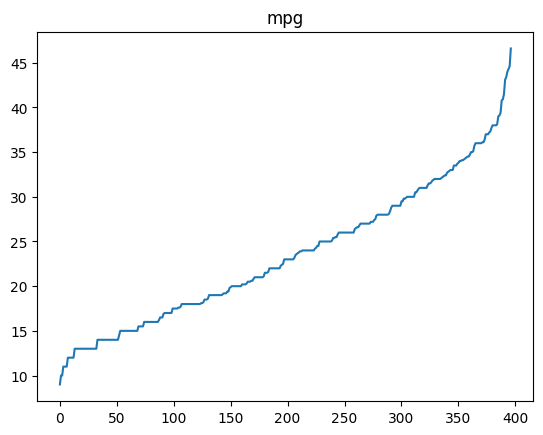

In [ ]:
!curl -LO https://www.statlearning.com/s/Auto.csv
auto = pd.read_csv("Auto.csv")
auto.info()
pd.set_option("display.expand_frame_repr", False)
print(auto.tail())
auto["mpg"].sort_values(ascending=True).reset_index(drop=True).plot(title="mpg");

### Exercise 12 ###
Prepare a line plot showing the relation between horsepower and acceleration. But first, clean the data. There is a reason why the `"horsepower"` column has the type `object`. Find it and fix it.

Hint: You can change the type of column using [pd.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).
Hint: Line plots are good for showing ordered sequences like time series. In this example, the data is not sorted in a proper way and you need to fix this. Later we are going to use scatter plots to show the relation between variables.

In [ ]:
# Put your code here


In [ ]:
# Put your code here


In [ ]:
# Put your code here


### Exercise 13 ###
Now show a bar and pie plot of the count of cars with different numbers of cylinders. First, prepare the data with [group by](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) and then see this article [article](https://pandas.pydata.org/docs/user_guide/visualization.html) on plot types. Can a similar effect be achieved with a histogram?

In [ ]:
# Put your code here


In [ ]:
# Put your code here


In [ ]:
# Put your code here


### Matplotlib and Seaborn
[Here](https://www.youtube.com/watch?v=GPVsHOlRBBI&t=21168s) you will find a simple introduction to visualization with [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html), which are great, but in the following, we will use Plotly Express.

## Plotly Express ##
Now we will analyze the incomes of Polish municipalities (pl. *gminy*) in recent years. The data has been downloaded from the BDL database "https://bdl.stat.gov.pl/BDL/start" and is available in the Google drive of this course. The code below downloads it into the Google Cloud machine that is running your Colab.

In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
!head "BDL municipality incomes 2015-2020.csv"
income = pd.read_csv("BDL municipality incomes 2015-2020.csv", sep=";", dtype={"Code": "str"})  # note the explicit type specification (codes have leading zeros)
income.info()

Downloading...
From: https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
To: /content/BDL municipality incomes 2015-2020.csv
100% 228k/228k [00:00<00:00, 121MB/s]
Code;Region;2015;2016;2017;2018;2019;2020
0201011;Bolesławiec (1);97766455.51;96585948.26;100354872.86;100026530.65;110798547.62;113856301.52
0201022;Bolesławiec (2);31072239.8;29138151.04;36830913.88;34848358.56;38715326.98;42888896.64
0201032;Gromadka (2);10899408.78;13139743.96;14541539.51;27057940.92;25721571.91;27544426.64
0201043;Nowogrodziec (3);18569147.18;29417467.57;31883450.73;31788855.91;39134198.61;33419083.79
0201052;Osiecznica (2);16746467.73;17098022.83;17601816.26;19841729.92;21776258.65;24843042.47
0201062;Warta Bolesławiecka (2);16269705.86;16155351.58;16070583.09;16794221.3;18054695.18;19244802.71
0202011;Bielawa (1);54275286.4;58726765.35;60796684.64;61443342.6;70138044.84;67916257.23
0202021;Dzierżoniów (1);54941541.12;61744190.73;61774957.23;71171888;81664887.31;79686672.41
0202031;Pieszyce

In [ ]:
import plotly.express as px

### Histograms
A histogram is a graph that shows the counts of observations that fall within given bins. It is used to inspect the *shape* of the distribution, i.e., whether it is symmetric, unimodal, etc. It can also be used to inspect the range of the observations (the minimum and maximum values) but is not very useful to inspect other summary statistics, such as quartiles.

This is how we construct a default histogram of a given column of a Pandas data frame using the Plotly Express plotting library.

In [ ]:
px.histogram(income,
             x="2020",
             title="Income of Polish municipalities in 2020",
             labels={"2020": "Income in PLN"})

The histogram shows that there are a few municipalities with extremely large incomes. Because of this, the histogram doesn't give us much information about the less wealthy regions. One of the ways to get more information is to plot a fragment of the x-axis. To do that, we can select regions with income below 30 mln PLN with `income[income['2020'] < 3e07]`. To control the details in the histogram, we also modify the `nbins` argument.  

In [ ]:
px.histogram(income[income["2020"] < 3e07],
             x="2020",
             nbins=200,
             title="Income of Polish municipalities in 2020 - fragment",
             labels={"2020": "Income in PLN"})

We can also plot a separate histogram for each voivodeship by passing a column name to the `facet_col` argument of the `px.histogram` method. This will create a table of histograms, with a different histogram for each value of the specified column. Each histogram will show the distribution of observations for a particular value of the `facet_col` column. The maximum number of histograms in a row is controlled by the `facet_col_wrap` argument.

In [ ]:
# let us first translate codes to voivodeship names
voivodeship_names = {
    "02": "Dolnośląskie",
    "04": "Kujawsko-pomorskie",
    "06": "Lubelskie",
    "08": "Lubuskie",
    "10": "Łódzkie",
    "12": "Małopolskie",
    "14": "Mazowieckie",
    "16": "Opolskie",
    "18": "Podkarpackie",
    "20": "Podlaskie",
    "22": "Pomorskie",
    "24": "Śląskie",
    "26": "Świętokrzyskie",
    "28": "Warmińsko-mazurskie",
    "30": "Wielkopolskie",
    "32": "Zachodniopomorskie"
}
code_list = [s[:2] for s in income["Code"]]
name_list = [voivodeship_names[code] for code in code_list]
income["Voivodeship"] = name_list

px.histogram(income[income["2020"] < 3e07],
             x="2020",
             facet_col="Voivodeship",
             facet_col_wrap=4,
             labels={"2020": "Income in PLN"},
             title="Income of Polish municipalities in 2020 per voivodeship - fragment")

### Exercise 14 - homework ###
Search Google for a way to get rid of the `"Voivodeship="` part of histogram titles and use it on the histogram above.

In [ ]:
# Put your code here


### Boxplots
A boxplot is another very common way to present the distribution of numerical data. It shows the summary statistics, i.e., the median, quartiles, and the minimum and maximum observations. In this way, it complements the information shown in a histogram, and both plots are sometimes combined.

This is how we create a boxplot of the incomes of municipalities in the Mazowieckie voivodeship with income less than 30 mln PLN:

In [ ]:
px.box(income[(income["Voivodeship"] == "Mazowieckie") & (income["2020"] < 3e07)],
       y="2020",
       title="Income of municipalities in the Mazowieckie voivodeship in 2020 - fragment",
       labels={"2020": "Income in PLN"})

The horizontal edges of the box correspond to the first and the third quartiles, i.e. 25-th and 75-th percentiles, or 0.25 and 0.75 quantiles. Inside the box, a horizontal line shows the median. Outside of the box, whiskers show the typical range of observations. They either reach the maximum or minimum value in the column or, if those values are far away from the median, their length is equal to 1.5 times the interquartile range, i.e. 1.5 times the height of the box. For a normal distribution, this corresponds to 99% of the observations. Points are used to show observations that are not within the whiskers.  

### Exercise 15 ###
Now calculate the min, max, median, 25-th and 75-th percentile, IQR, lower fence, and upper fence in Pandas. Did you get the same values as on the plot? Can you explain?

Hint: Use [df.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) or [df.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html).

In [ ]:
# Put your code here


### Exercise 16 ###
Create a series of boxplots, with a single boxplot for a single voivodeship, by passing the `Voivodeship` column name to the `x` argument of `px.box()`.

In [ ]:
# Put your code here


### Scatter plots
Scatter plots are used to represent two-dimensional distributions or pairs of values. They simply represent pairs of values as points and are mostly useful to check the two-dimensional shape of the distribution, the correlation between variables, their ranges, etc., but do not tell us almost anything about the summary statistics.

This is how we create a basic scatter plot in Plotly Express, we will add a straight line using the `add_scatter` method to visualize how the income has changed from 2019 to 2020. Note that we don't need to specify the data frame in `px.add_scatter`, we just pass numerical data to the `x` and `y` variables.


In [ ]:
fig = px.scatter(income,
                 x='2019',
                 y='2020',
                 title='Income of Polish municipalities in 2020 vs 2019')
fig.add_scatter(x=[0, 13.5e09], y=[0, 13.5e09], showlegend=False)

### Exercise 17. ###
Create a scatter plot showing the income in the years 2019 and 2020 for those municipalities that had an income lower than **50** mln PLN in the year **2019**. Add a straight line and check visually if the incomes have increased or decreased. Can you see something suspicious in the plot?    


In [ ]:
# Put your code here


### Exercise 18 - homework ###
Search Google for examples of using the `hover_data` and `hover_name` arguments in Plotly plots. Use the `hover_data` argument of `px.scatter` to add the voivodeship name to the information about the data points and the `hover_name` argument to add the region name. Use this to identify regions with suspicious data.

In [ ]:
# Put your code here


## Further reading/materials ##

* Recommended [book](https://www.statlearning.com/)
* [Colab forms](https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=7bBCtuAoTPfb)
* [Colab layout widgets](https://colab.research.google.com/notebooks/widgets.ipynb)
* [Colab charts](https://colab.research.google.com/notebooks/charts.ipynb)
* [Colab profiling and timing code](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb)
* If you have more time and want to practice and get more details watch [this](https://www.youtube.com/watch?v=GPVsHOlRBBI) or [this](https://www.youtube.com/watch?v=r-uOLxNrNk8). Here is the [data visualization guide](https://jovian.com/aakashns/dataviz-cheatsheet) from one of these courses. It has code examples for Line graphs, Scatter plots, Histograms and Frequency Distribution, Heatmap, Contour plots, Box plots, Bar charts (in Marplotlib and Seaborn).
* Here are sample visualizations in [Matplotlib](https://matplotlib.org/stable/gallery/index.html), [Seaborn](https://seaborn.pydata.org/examples/index.html) and [Plotly express](https://plotly.com/python/plotly-express/#gallery).
* Here are tutorials for [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html), [Seaborn](https://seaborn.pydata.org/tutorial.html), and [Plotly Express](https://plotly.com/python/plotly-express/)
* For publishing data in AI and data science projects see: [Data Version Control (DVC)](https://dvc.org/), and [Zenodo](https://zenodo.org/).


## Dataset sources ##
Here are some sources for sample datasets:
* https://www.kaggle.com/datasets?fileType=csv
* https://archive.ics.uci.edu/
* https://snap.stanford.edu/data/
* https://code.datasciencedojo.com/datasciencedojo/datasets

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>